# 画像に関する基礎知識

- <u>画像を構成する「画素」</u>
    - 「画素」 (pixel)を縦横に並べたものが画像
    - 「画素」 は**色の点**である


- <u>NumPyで配列として画像を扱うための基礎知識</u>
    - 「色」 は基本的な成分によって合成されている
        - RGB　(Red, Green, Blue)　:　加法混色(加色混合)
        - CMY　(Cyan, Magenta, Yellow)　:　減法混色(減色混合)


- <u>「色」は３つの値の組み合わせ</u> ->　配列で実現できる
    - 各種を**符号なし8bit**の値(0~255)で表現するのが標準的
    - 型　:　'unit8'

## NumPyでの画像の扱い
- 画素を配列として表現する
    - その画素も中身は配列になっている
    - 画素　=　[ R, G, B, α ]　:　R,G,B,α の４要素の一次元配列。グレースケールの場合は１つの数値
        - 注意)　αは不透明度、これがない場合も多い

# 画像データの取り扱い(1)

### 画像を扱うライブラリ
- <u>OpenCV (ライブラリ名 cv2)</u>
    - インテル(米)が開発したコンピュータビジョンのためのC++,(python用もある)


- <u>Pillow (ライブラリ名はPIL)</u>
    - python用の画像処理ライブラリ
    - 画像の補正やレタッチ、描画などの機能を提供する

## 画像データの扱い

In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV ライブラリ

### 画像ファイルの読み込み

In [15]:
fn = r'images/01.jpg'
imBGR = cv2.imread(fn)

In [16]:
type(imBGR)

numpy.ndarray

### matplotlib で画像を表示する

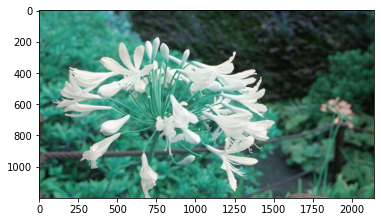

In [17]:
plt.imshow(imBGR)

### OpenCV で画像を扱う場合の注意点
- 色の成分の並び(順番)が BGR (Blue, Green, Red)
    - OpenCVの仕様

### BGR　->　RGBへ変換
- 一旦 numpy の配列になったらスライスなどで、自由に変形できる

In [18]:
imRGB = imBGR[:, :, [2, 1, 0]]  # 行 : 列 : 色チャンネル /　全ての行・列に対して、色チャンネルの順番を逆転した形で並べる

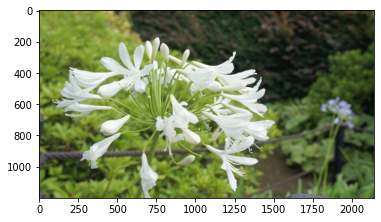

In [20]:
plt.imshow(imRGB)

In [21]:
imRGB[0, 0, :]  # 左上の画素のdataを眺める

array([121, 144,  40], dtype=uint8)

- 一次元配列, Red, Green, Blue, の順番

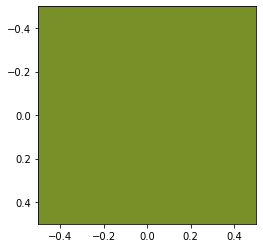

In [22]:
# 画素　１点１点を取り出す
plt.imshow(imRGB[:1, :1, :])

- 確認した画素を表示すると上記のようになる(左上１点の画素を表示)

In [25]:
# 画素１点からなる画像として取り出した時
imRGB[:1, :1, :]

array([[[121, 144,  40]]], dtype=uint8)

In [26]:
# 画素として１点を取り出した時
imRGB[0, 0, :] 

array([121, 144,  40], dtype=uint8)

#### 画素と画像の違い
- <u>画素１点を取り出した時</u>
    - array([121, 144,  40], dtype=uint8)


- <u>画素１点からなる画像として取り出した時</u>
    - array([[[121, 144,  40]]], dtype=uint8)
    

- <u>画像として扱う場合は、行と列の配置を持ったdataでなければならない</u>

### 目盛を非表示にする

([], [])

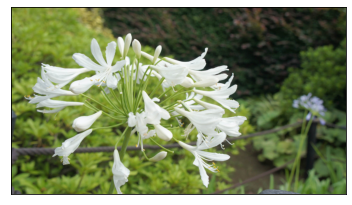

In [27]:
plt.imshow(imRGB)
plt.xticks(ticks=[]) # 空の list を入れる事によって、横軸の目盛に関するものは無くなる
plt.yticks(ticks=[]) # 空の list を入れる事によって、縦軸の目盛に関するものは無くなる

### 画素構成の変更

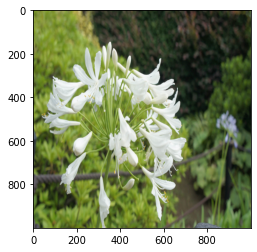

In [28]:
im2 = cv2.resize(imRGB, (1000, 1000)) # リサイズしたいdata　:　tuple型で(横, 縦)　:　アスペクト比を無視
plt.imshow(im2)

In [29]:
imRGB.shape

(1200, 2145, 3)

- 横　:　1200,　縦　:　2145,　RGB

- 空の画像データは三次元配列になっている

In [30]:
print(1200/3)
print(2145/3)

400.0
715.0


- numpy の配列だと(行数, 列数)　= (縦, 横)
    - 配列だとどうしても表形式の縦x横の順番になる

- OpenCV だと (横, 縦)

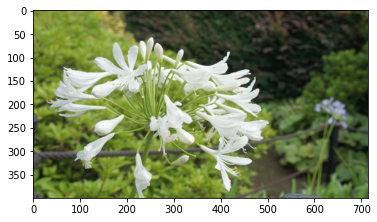

In [31]:
im2 = cv2.resize(imRGB, (715, 400)) # アスペクト比を保持
plt.imshow(im2)

### 極端に縮小してみる

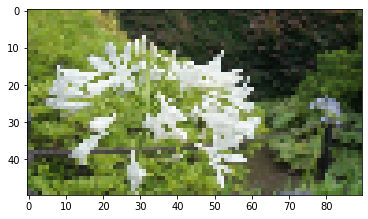

In [32]:
im2 = cv2.resize(imRGB, (90, 50)) # 低解像度にしてみる
plt.imshow(im2)

- 画素の構成が目に見えるくらいのなっている
    - **ジャギー** ギザギザが表示されている

## 画像の縦横に関する注意事項
- <u>OpenCVでのsize指定</u>
    - **cv2.resize( 画像配列, (横幅, 高さ))**

- <u>画像配列にアクセスする場合</u>
    - **配列[　行位置(縦),　列位置(横),　色成分の位置　]**
    - 表形式なのでそうなってしまう。(行, 列)

### 画像の部分抽出

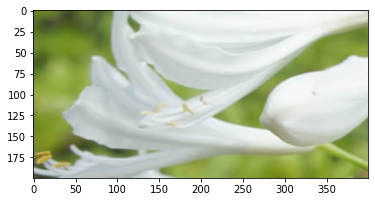

In [33]:
im2 = imRGB[400:600, 100:500, :]
plt.imshow(im2)

#### 人工知能のアルゴリズムを使って部分を特定するいう事があるが…
- どうやって取り出しているかというと、上記のような考え方で要素アクセスしている場合もある
- 一番基本的な考え方

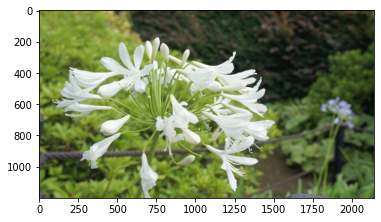

In [34]:
plt.imshow(imRGB)

## まとめ
- <u>画像ファイルを読み込む</u>
    - **cv2.imread(画像path)　:　読み取り結果をNumPy配列として返す
    - 得られる配列の色成分の順序は, Blue, Green, Red (BGR)
        - 必要に応じて色成分の順序を変換する必要がある


- <u>画像データの表示</u>
    - **plt.imshow( RGB配列 )**　:　色成分の順序に注意する
    - 定石として、読み込んだ時にRGBに変換しておく


- <u>色成分の変換　(BGR　->　RGB)</u>
    - **BGR配列[ :, :, [ 2, 1, 0] ]**　:　α成分なし(不透明度情報なし)
    - **BGR配列[ :, :, [2, 1, 0, 3] ]**　:　α成分あり(不透明度情報あり), .pngなど


- <u>参考</u>
    - cvtColor 関数を使用する方法もある
        - これを使って色チャンネルを変更できる


- <u>画面サイズの変更</u>
    - **cv2.resize(　画像配列, (横幅, 高さ))**　:　「画像配列」のサイズを変更したものを返す

# 画像データの取り扱い(2)

### カラーの画像をモノクロに変換する
- 色の情報を捨て去ることで扱う情報のサイズを削減できる
- カラーの場合は１つの画素は一次元配列（ベクトル）である
- グレースケールにすると画素は単一の数値(スカラー)である
    - 白黒の度合いを意味する(二次元配列)として扱うことができる
- 画像認識(物体認識)の前処理としてモノクロ化する事が多い

### グレースケールへの変換

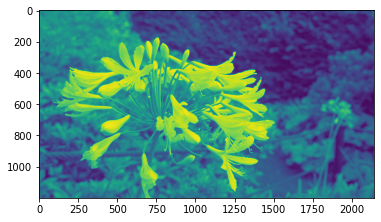

In [35]:
imGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY) # 元のカラー画像　:　変換の形式　:　
plt.imshow(imGray)

- imshow( )関数で表示すると、default では上記のようなカラーマップで表示される

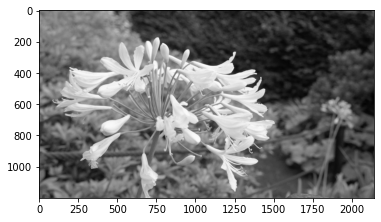

In [36]:
#　imshow(　)引数にcmap=plt.cm.grayを与える
imGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY) # 元のカラー画像　:　変換の形式　:　
plt.imshow(imGray, cmap=plt.cm.gray)  # 色の諧調を指定する　: packageで定義されているgrayに変換

### 一部分を閲覧

In [38]:
print(imGray[:5, :5])  # 行方向,列方向どっちも 0 ~ 5 未満 : 5x5 の画像の配列を数値として並べる

[[125 126 127 127 128]
 [125 125 126 127 128]
 [124 124 125 126 127]
 [123 123 124 124 125]
 [121 121 122 123 124]]


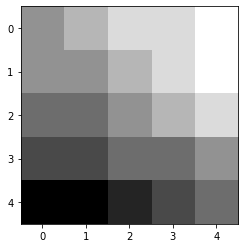

In [40]:
plt.imshow(imGray[:5, :5], cmap=plt.cm.gray)

In [41]:
# 画素1個を取り出す
imGray[0, 0]

125

## 白黒2値化
- ２つの値にしてしまう。白か黒にくっきり分けてしまう
    - **認識精度がすごくよくなる**

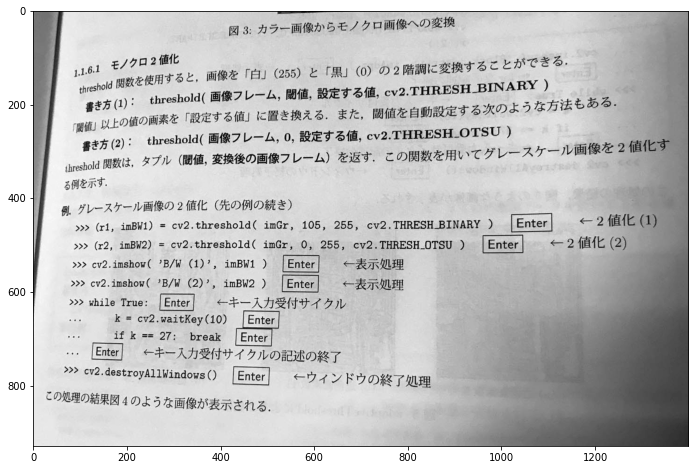

In [45]:
imGr = cv2.imread('grscale01.jpg', cv2.IMREAD_GRAYSCALE) # 引数に　　cv2.IMREAD_GRAYSCALE : 読み込みの段階でグレースケールにしてくれる
plt.figure(figsize=(12, 8))
plt.imshow(imGr, cmap=plt.cm.gray)

In [48]:
imGr.shape  # 配列の形状確認

(929, 1400)

- 929行, 1400列 -> 二次元になっている

- 画像処理では画像を表現しているobjectはどういう次元のものか？を常に意識しておかないと、正しい認識処理ができない

## 閾値(しきいち)２値化
- 閾値で白か黒判定
- どこかを基準にして白か黒かを分けてしまう　->　その為の基準値「閾値」という

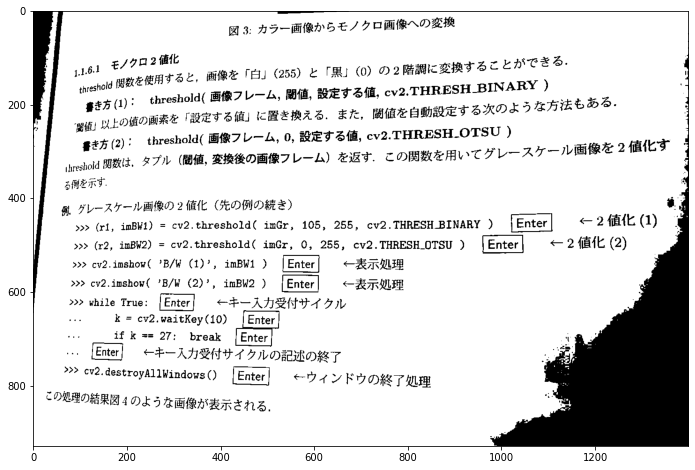

In [51]:
(th, imBW) = cv2.threshold(imGr, 128, 255, cv2.THRESH_BINARY)  # 画像 :　閾値 :　閾値を超えたら 0 or 255 どちらかにする　: 本当に２つに分けて下さいという　モード指定
plt.figure(figsize=(12, 8))
plt.imshow(imBW, cmap=plt.cm.gray)

- あるレベルを境に,閾値より大きいものはクッキリと真白に処理されている

- 閾値より小さいものは、クッキリと真っ黒に処理されている

- THRESH_BINARY で２つに分けられている

## 大津(おおつ)の2値化
- 大津先生が考えた法則
- 閾値を画像全体から、自動的に判断して、自動的に算出するアルゴリズム

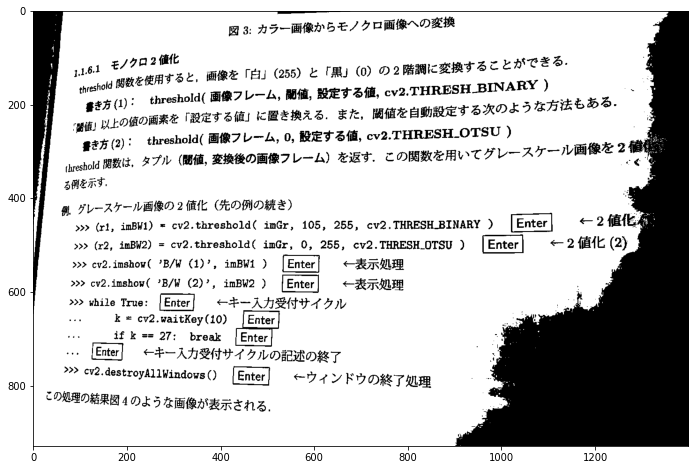

In [56]:
(th, imBW) = cv2.threshold(imGr, 128, 255, cv2.THRESH_OTSU)  # 画像 :　閾値 :　閾値を超えたら 0 or 255 どちらかにする　: 自動に閾値を判別してくれる
plt.figure(figsize=(12, 8))
plt.imshow(imBW, cmap=plt.cm.gray)

In [57]:
th # THRESH_OTSU が選んだ閾値

156.0

## 適応的閾値処理

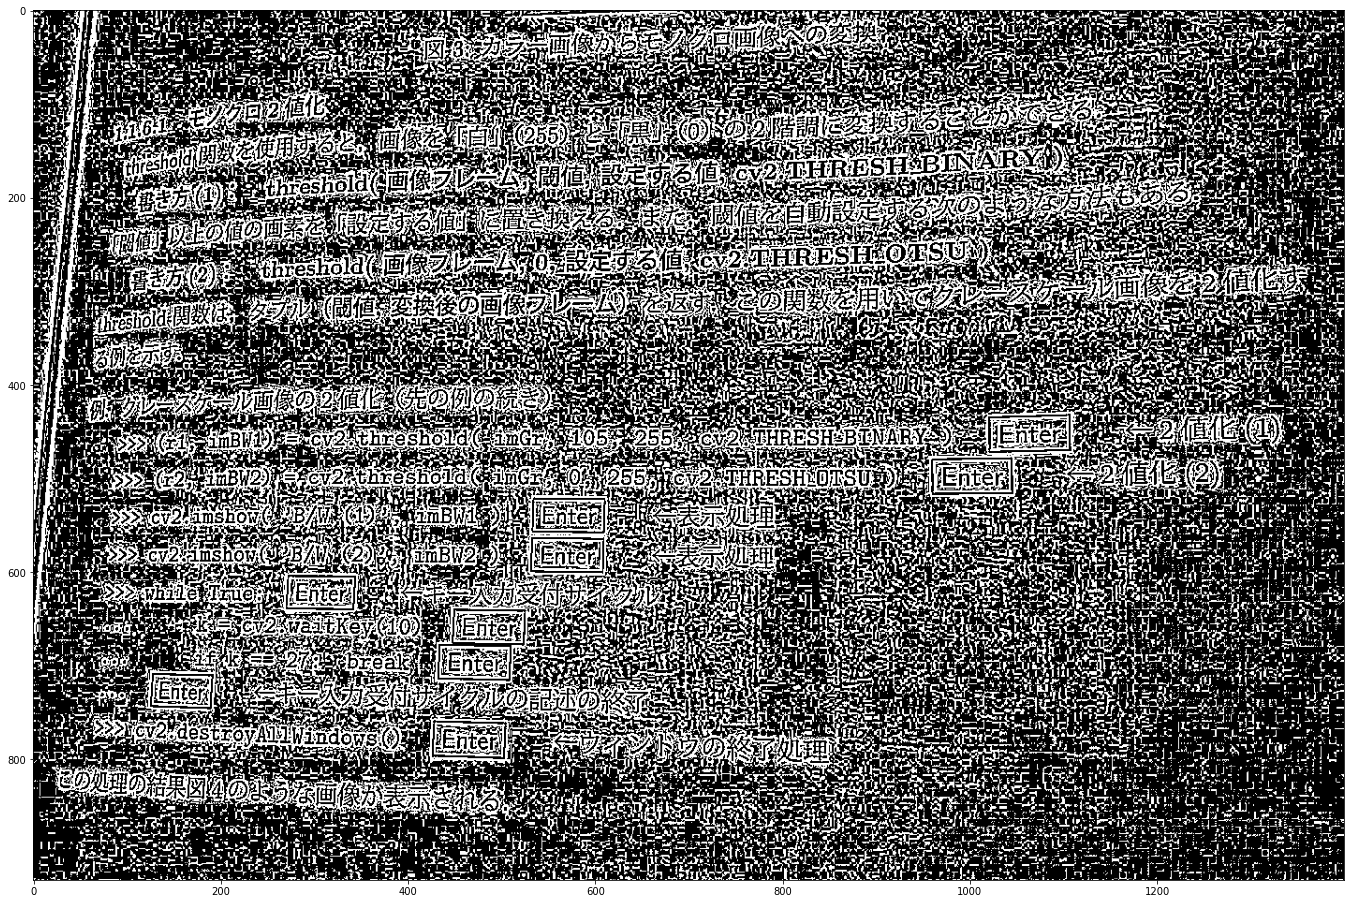

In [58]:
# 元の画像 :　白の何番にするか？ :　平均の定数(周りと比べて平均をとって判定してくれる) : 2つに綺麗に分ける為 : 四方のサイズ(画像のドットサイズ) :　適用的なアルゴリズに満足できないケースの時にどれくらい調整するのか
imBW = cv2.adaptiveThreshold(imGr, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 0)
plt.figure(figsize=(24, 16))
plt.imshow(imBW, cmap=plt.cm.gray)

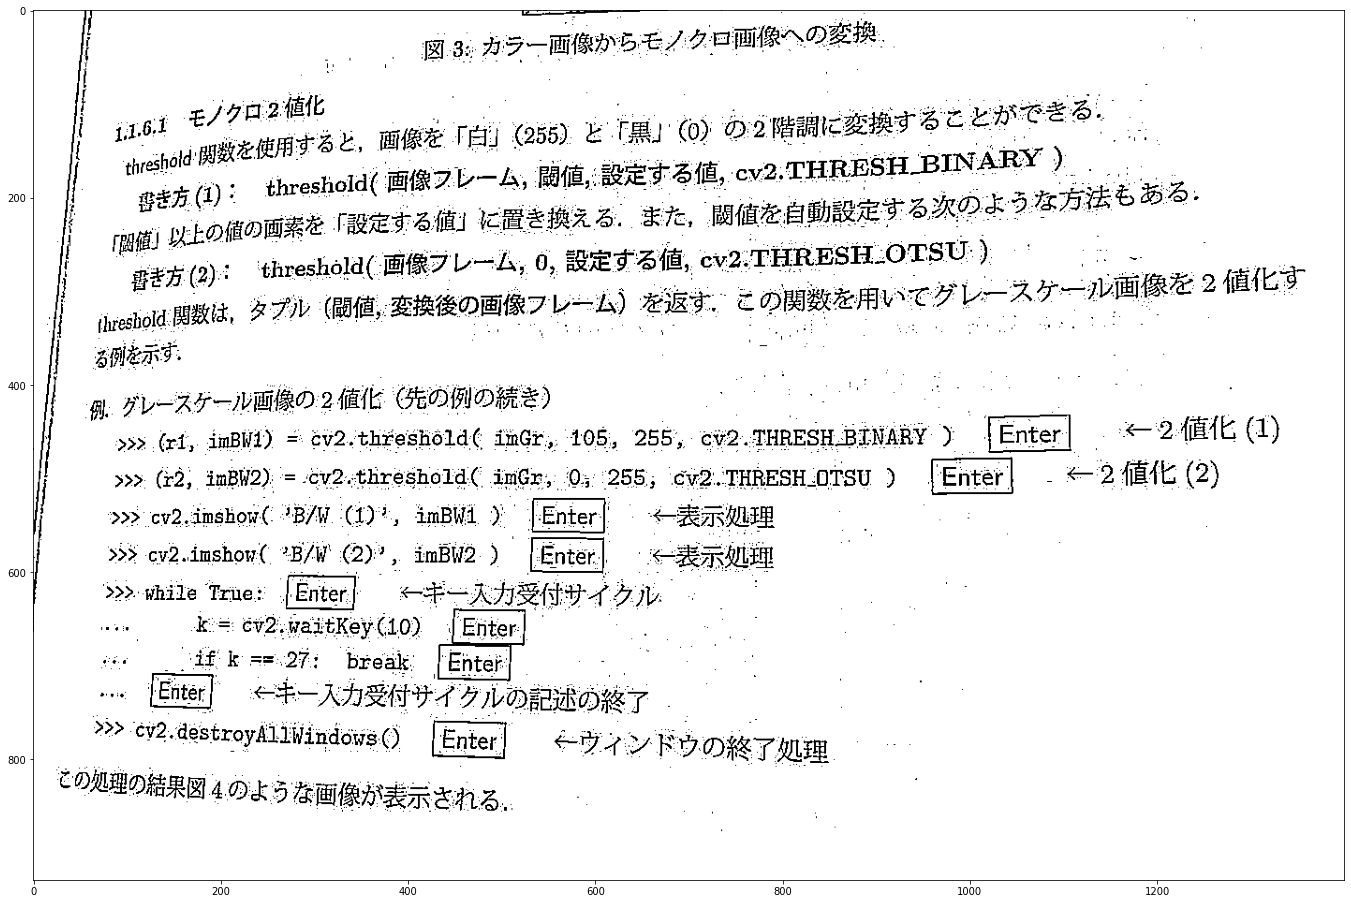

In [61]:
# 元の画像 :　白の何番にするか？ :　平均の定数(周りと比べて平均をとって判定してくれる) : 2つに綺麗に分ける為 : 四方のサイズ(画像のドットサイズ) :　適用的なアルゴリズに満足できないケースの時にどれくらい調整するのか
imBW = cv2.adaptiveThreshold(imGr, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)
plt.figure(figsize=(24, 16))
plt.imshow(imBW, cmap=plt.cm.gray)

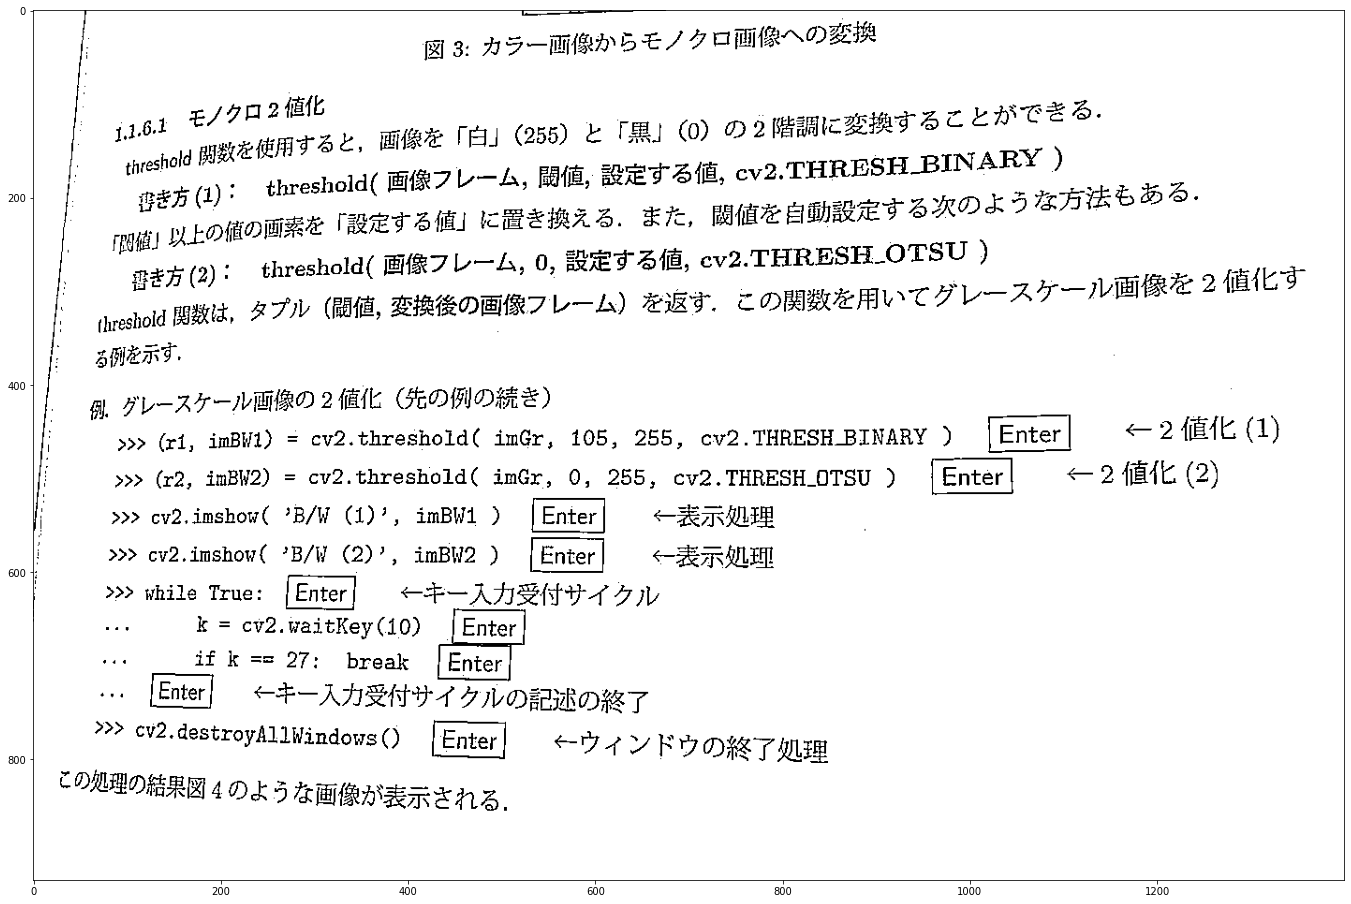

In [62]:
# 元の画像 :　白の何番にするか？ :　平均の定数(周りと比べて平均をとって判定してくれる) : 2つに綺麗に分ける為 : 四方のサイズ(画像のドットサイズ) :　適用的なアルゴリズに満足できないケースの時にどれくらい調整するのか
imBW = cv2.adaptiveThreshold(imGr, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 20)
plt.figure(figsize=(24, 16))
plt.imshow(imBW, cmap=plt.cm.gray)

#### 人工知能の文字認識の前処理として、かなり綺麗に前処理ができている

## 画像ファイルの保存

In [63]:
cv2.imwrite('grscale01_bw.jpg', imBW) # ファイル名 :　出力したい配列object

True

## まとめ
- <u>BGRの画像配列をグレースケールに変換する方法</u>
    - **cv2.cvtColor(BGR画像配列, cv2COLOR_BGR2GRAY)**
        - グレースケール画像の配列を返す
    - 画像fileを読み込む段階でグレースケールに変換する
        - **cv2.imread('file名', cv2.IMREAD_GRAYSCALE)**
        - グレースケール画像の配列を返す


- <u>白黒２値化への変換</u>
    - 決まった閾値で白黒を判定する方法
    - **(th, imBW) = cv2.threshold(グレースケール画像配列, 閾値, ２５５, cv2.THRESH_BINARY)**
        - 閾値は基準となる値を記述
        - ２５５は真っ白
        - cv2.THRESH_BINARY : 綺麗に２つにしてしまう。理解しやすく単純
    
    - **大津のアルゴリズム**
    - (th, imBW) = cv2.threshold(グレースケール画像配列, 0, 255, cv2.THRESH_OTSU)
        - 閾値を自動で算出してくれる
    - th　には閾値が,　imBW　には白黒２値の画像配列が得られる


- <u>適応的閾値処理</u>
    - **imBW = cv2.adaptiveThreshold(グレースケール画像配列,
        255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 判定用画像素数, 閾値の調整)**
    - 「判定用画像素数」　で判定の細かさを指定　:　判定画素の四方サイズ指定
    - 「閾値の調整」　で切り捨てレベルを指定　:　満足できない場合はノイズを自らの手で調整できる


- <u>画像配列をファイルに保存</u>
    - **cv.imwrite('ファイル名', 画像配列)**